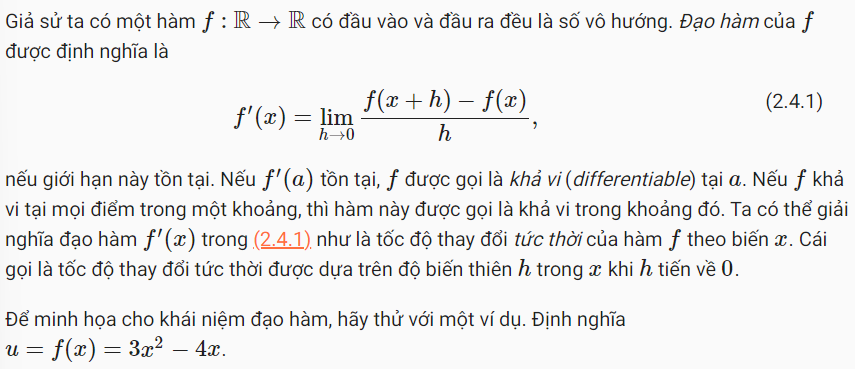

In [8]:
from d2l import mxnet as d2l
from IPython import display
from mxnet import np, npx
npx.set_np()

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print('h = %.5f, numerical limit = %.5f' % (h, numerical_lim(f, 1, h)))
    h *= 0.1

h = 0.10000, numerical limit = 2.30000
h = 0.01000, numerical limit = 2.03000
h = 0.00100, numerical limit = 2.00300
h = 0.00010, numerical limit = 2.00030
h = 0.00001, numerical limit = 2.00003


Ta sử dụng matplotlib để vẽ biểu đồ. Trong đoạn mã sau, hàm use_svg_display chỉ định matplotlib tạo các biểu đồ ở dạng svg để có chất lượng ảnh sắc nét hơn

In [10]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

Sử dụng hàm set_figsize để chỉ định kích thước của biểu đồ. Lưu ý ta đang dùng trực tiếp d2l.plt do câu lệnh from matplotlib import pyplot as plt đã được đánh dấu để lưu vào gói d2l.

In [ ]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

Hàm set_axes cấu hình thuộc tính của các trục biểu đồ tạo bởi matplotlib:

In [ ]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

Với 3 hàm cấu hình biểu đồ, ta định nghĩa hàm plot để vẽ đồ thị nhanh chóng:

In [11]:
def plot(X, Y = None, xlabel = None, ylabel = None, legend = [], xlim = None,
         ylim = None, xscale = 'linear', yscale = 'linear',
         # Danh sách các định dạng cho đường biểu diễn
         # '-' : Đường liền nét
         # 'm--' : Đường nét đứt màu tím
         # 'g--' : Đường nét đứt màu xanh lá
         # 'r': Đường chấm màu đỏ
         fmts = ['-', 'm--', 'g--', 'r:'], figsize = (3.5, 2.5), axes = None):
    """Plot data points"""
    d2l.set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    """Return True if X (ndarray of list) has 1 axis"""
    # Hàm phụ này dùng để kiểm tra xem dữ liều đầu vào có một chiều hay không
    # Nếu X là một mảng numpy (ndarray) thì sẽ kiểm tra số chiều ndim == 1
    # Nễu X là một danh sách (list) thì sẽ kiểm tra các phần tử trong danh sách đó có phải danh sách lồng nhau không
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
    
    # Nếu X chỉ có một chiều thì nó sẽ được chuyển thành danh sách chứa một phần tử để nhất quán khi vẽ nhiều đường
    if has_one_axis(X):
        X = [X]
    
    # Nếu Y không được cung cấp thì giá trị của Y sẽ được lấy từ X và X được thay bằng danh sách trống
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y): # Nếu Y chỉ có một chiều thì nó cũng được chuyển thành danh sách chứa một phần tử
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)
    
    # Hàm xóa nội dung của trục trước khi vẽ axes.cla()
    axes.cla()

    # Duyệt qua từng cặp dữ liệu (x, y) và định dạng tương ứng fmt. Nếu dữ liệu X có độ dài > 0, hàm vẽ cả x và y nếu không thì chỉ vẽ y
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)